<h2><center>Critical Temperature Prediction 2</center></h2>

<h3><center>Principal Component Analysis, Decision Trees, Linear Regression and Naïve Bayes</center></h3>

---

The purpose of this project is to produce and compare regression and classification models with a full chemical dataset and its projection into principal components. The dataset, adapted from the [supercondutivity data](https://archive.ics.uci.edu/dataset/464/superconductivty+data), contains information on 21263 superconductors and has 81 chemical features along with their chemical composition and critical temperature (which constitutes the target variable).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score, matthews_corrcoef, precision_score, recall_score, explained_variance_score
from sklearn.metrics import root_mean_squared_error, accuracy_score, max_error, mean_absolute_error
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr

## Exploratory data analysis

In [2]:
train = pd.read_csv("train.csv")

In [3]:
train

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.00
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.00
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.00
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.00
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,4,106.957877,53.095769,82.515384,43.135565,1.177145,1.254119,146.88130,15.504479,65.764081,...,3.555556,3.223710,3.519911,1.377820,0.913658,1,2.168889,0.433013,0.496904,2.44
21259,5,92.266740,49.021367,64.812662,32.867748,1.323287,1.571630,188.38390,7.353333,69.232655,...,2.047619,2.168944,2.038991,1.594167,1.337246,1,0.904762,0.400000,0.212959,122.10
21260,2,99.663190,95.609104,99.433882,95.464320,0.690847,0.530198,13.51362,53.041104,6.756810,...,4.800000,4.472136,4.781762,0.686962,0.450561,1,3.200000,0.500000,0.400000,1.98
21261,2,99.663190,97.095602,99.433882,96.901083,0.690847,0.640883,13.51362,31.115202,6.756810,...,4.690000,4.472136,4.665819,0.686962,0.577601,1,2.210000,0.500000,0.462493,1.84


In [4]:
unique = pd.read_csv("unique_m.csv")

In [5]:
unique

,H,He,Li,Be,B,C,N,O,F,Ne,...,Au,Hg,Tl,Pb,Bi,Po,At,Rn,critical_temp,material
0,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,29.00,Ba0.2La1.8Cu1O4
1,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,26.00,Ba0.1La1.9Ag0.1Cu0.9O4
2,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,19.00,Ba0.1La1.9Cu1O4
3,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,22.00,Ba0.15La1.85Cu1O4
4,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,23.00,Ba0.3La1.7Cu1O4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,2.44,Tm0.84Lu0.16Fe3Si5
21259,0.0,0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0,...,0.0,0.0,1.0,0.0,0.0,0,0,0,122.10,Tl1Ba2Ca3Cu4O11
21260,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,1.98,Nb0.8Pd0.2
21261,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,1.84,Nb0.69Pd0.31


In [6]:
unique = unique.drop(columns = ['critical_temp', 'material'])

Both datasets were combined into a single dataset before performing dimensionality reduction and creating the classification/regression models. In this way, the full dataset is used without losing any information or repeating the same lines of code for the two isolated datasets.

In [7]:
merged_df = pd.merge(train, unique, left_index=True, right_index=True)

In [8]:
merged_df.isnull().sum().sum()

0

In [9]:
# Split the trainining and testing sets
train_data = merged_df.drop('critical_temp', axis=1)
train_labels = merged_df['critical_temp']

# Split the data into a training set, a validation set, and a testing set
x_trainval, x_test, y_trainval, y_test = train_test_split(train_data, train_labels, test_size=0.1, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_trainval, y_trainval, test_size=0.25, random_state=42)

The following code maps the dependent variable, "critical_temp", into classes. 

In [10]:
bins = [0.0, 1.0, 5.0, 20.0, 100.0, 200.0]
labels = ["Very Low", "Low", "Medium", "High", "Very High"]
y_train_class = pd.cut(y_train, bins = bins, labels = labels, right = False, include_lowest = True)
y_val_class = pd.cut(y_val, bins = bins, labels = labels, right = False, include_lowest = True)

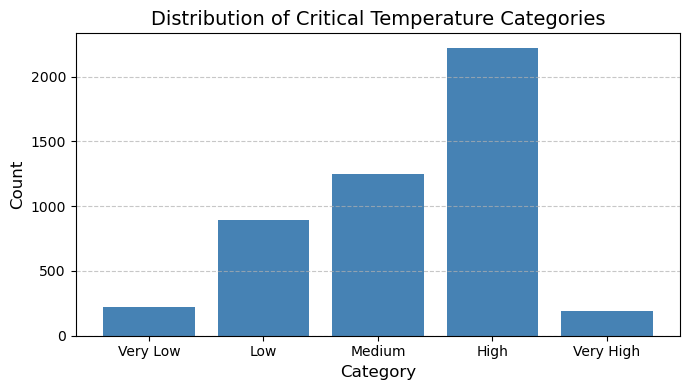

In [11]:
value_counts = y_val_class.value_counts().reindex(labels)

plt.figure(figsize=(7, 4))
plt.bar(value_counts.index, value_counts.values, color='steelblue')
plt.xlabel('Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Critical Temperature Categories', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Dimensionality reduction

In [12]:
# Create a scaler with training set
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_val_scaled = scaler.transform(x_val)
x_test_scaled = scaler.transform(x_test)

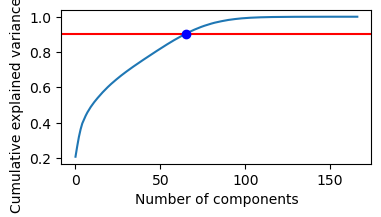

The number of PCs at the point where the cumulative explained variance ratio is 0.9 is: 66


In [13]:
# Fit PCA to the scaled data
pca = PCA().fit(x_train_scaled)

# Calculate the cumulative sum of explained variance ratios
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Plot the cumulative sum
plt.figure(figsize=(4,2))
plt.plot(cumulative_variance_ratio)
plt.axhline(y=0.90, color='r', linestyle='-')

# Find index where cumulative explained variance ratio exceeds 0.90
n_components = np.argmax(cumulative_variance_ratio >= 0.90)

# Add marker for point where cumulative explained variance ratio equals 0.90
plt.plot(n_components, cumulative_variance_ratio[n_components], 'bo')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance ratio')
plt.show()

print('The number of PCs at the point where the cumulative explained variance ratio is 0.9 is:', n_components+1)

In [14]:
# Perform dimensionality reduction with PCA
pca = PCA(n_components+1)
pca.fit(x_train_scaled)
tve = 0
for i, ve in enumerate(pca.explained_variance_ratio_):
    tve += ve
    # The following if statements were added to print only the first and last 3 retained PCs.
    if i < 3:
        print("PC%d - Variance explained: %7.4f - Total Variance: %7.4f" % (i+1, ve, tve))
    if i > 62:
        print("PC%d - Variance explained: %7.4f - Total Variance: %7.4f" % (i+1, ve, tve))

PC1 - Variance explained:  0.2087 - Total Variance:  0.2087
PC2 - Variance explained:  0.0582 - Total Variance:  0.2669
PC3 - Variance explained:  0.0534 - Total Variance:  0.3203
PC64 - Variance explained:  0.0052 - Total Variance:  0.8939
PC65 - Variance explained:  0.0050 - Total Variance:  0.8989
PC66 - Variance explained:  0.0049 - Total Variance:  0.9039


In [15]:
# Applying PCA to the training and validation sets
x_train_transformed = pca.transform(x_train_scaled)
x_val_transformed = pca.transform(x_val_scaled)

## Regression models

In [16]:
def print_regression_statistics(truth, preds):
    
    print("The RVE is: ", explained_variance_score(truth, preds))
    print("The rmse is: ", root_mean_squared_error(truth, preds))
    corr, pval = pearsonr(truth, preds)
    print("The Correlation Score is is: %6.4f (p-value=%e)"%(corr,pval))
    print("The Maximum Error is is: ", max_error(truth, preds))
    print("The Mean Absolute Error is: ", mean_absolute_error(truth, preds))

**Linear Regression**

In [17]:
# Full dataset model
reg_full = LinearRegression()
reg_full.fit(x_train_scaled, y_train)
y_pred_full = reg_full.predict(x_val_scaled)
print("Full dataset model (Linear Regression) performance:")
print_regression_statistics(y_val, y_pred_full)

# PCA transformed dataset model
reg_pca = LinearRegression()
reg_pca.fit(x_train_transformed, y_train)
y_pred_pca = reg_pca.predict(x_val_transformed)
print("\nPCA transformed dataset model (Linear Regression) performance:")
print_regression_statistics(y_val, y_pred_pca)

Full dataset model (Linear Regression) performance:
The RVE is:  0.7623142440304607
The rmse is:  16.68154376979702
The Correlation Score is is: 0.8732 (p-value=0.000000e+00)
The Maximum Error is is:  133.22635521436055
The Mean Absolute Error is:  12.37740720425595

PCA transformed dataset model (Linear Regression) performance:
The RVE is:  0.6648722523269839
The rmse is:  19.80496670038947
The Correlation Score is is: 0.8154 (p-value=0.000000e+00)
The Maximum Error is is:  198.16354410479505
The Mean Absolute Error is:  14.73243184038409


**Decision Tree Regressor**

In [18]:
# Full dataset model
tree_full = DecisionTreeRegressor()
tree_full.fit(x_train_scaled, y_train)
y_pred_full = tree_full.predict(x_val_scaled)
print("Full dataset model (Decision Tree Regressor) performance:")
print_regression_statistics(y_val, y_pred_full)

# PCA transformed dataset model
tree_pca = DecisionTreeRegressor()
tree_pca.fit(x_train_transformed, y_train)
y_pred_pca = tree_pca.predict(x_val_transformed)
print("\nPCA transformed dataset model (Decision Tree Regressor) performance:")
print_regression_statistics(y_val, y_pred_pca)

Full dataset model (Decision Tree Regressor) performance:
The RVE is:  0.8672173634563035
The rmse is:  12.459229774286932
The Correlation Score is is: 0.9334 (p-value=0.000000e+00)
The Maximum Error is is:  168.0
The Mean Absolute Error is:  6.230421284844905

PCA transformed dataset model (Decision Tree Regressor) performance:
The RVE is:  0.8507515191518852
The rmse is:  13.212862852811961
The Correlation Score is is: 0.9251 (p-value=0.000000e+00)
The Maximum Error is is:  130.2
The Mean Absolute Error is:  6.7425689236683874


## Classification models

**Gaussian Naïve Bayes**

In [19]:
def print_classification_statistics(y_test, preds):
    
    print("The F1 score is: %7.4f" % f1_score(y_test, preds, average = "macro"))
    print("The MCC score is: %7.4f" % matthews_corrcoef(y_test, preds))
    print("The precision score is: %7.4f" %  precision_score(y_test, preds, average = "macro"))
    print("The recall score is: %7.4f" %  recall_score(y_test, preds, average = "macro"))
    print("The accuracy is: ", accuracy_score(y_test, preds))

In [20]:
nb_full = GaussianNB()
nb_full.fit(x_train_scaled, y_train_class)
y_pred_full_nb = nb_full.predict(x_val_scaled)
print("Full dataset model (Naive Bayes) performance:")
print_classification_statistics(y_val_class, y_pred_full_nb)

nb_pca = GaussianNB()
nb_pca.fit(x_train_transformed, y_train_class)
y_pred_pca_nb = nb_pca.predict(x_val_transformed)
print("\nPCA transformed dataset model (Naive Bayes) performance:")
print_classification_statistics(y_val_class, y_pred_pca_nb)

Full dataset model (Naive Bayes) performance:
The F1 score is:  0.3578
The MCC score is:  0.3322
The precision score is:  0.4538
The recall score is:  0.5652
The accuracy is:  0.46258361204013376

PCA transformed dataset model (Naive Bayes) performance:
The F1 score is:  0.3575
The MCC score is:  0.2024
The precision score is:  0.3745
The recall score is:  0.4288
The accuracy is:  0.48181438127090304


**Decision Tree Classifier**

In [21]:
tree_full_c = DecisionTreeClassifier()
tree_full_c.fit(x_train_scaled, y_train_class)
y_pred_full_tree = tree_full_c.predict(x_val_scaled)
print("Full dataset model (Decision Tree) performance:")
print_classification_statistics(y_val_class, y_pred_full_tree)

tree_pca_c = DecisionTreeClassifier()
tree_pca_c.fit(x_train_transformed, y_train_class)
y_pred_pca_tree = tree_pca_c.predict(x_val_transformed)
print("\nPCA transformed dataset model (Decision Tree) performance:")
print_classification_statistics(y_val_class, y_pred_pca_tree)

Full dataset model (Decision Tree) performance:
The F1 score is:  0.8014
The MCC score is:  0.7677
The precision score is:  0.8121
The recall score is:  0.7917
The accuracy is:  0.8434364548494984

PCA transformed dataset model (Decision Tree) performance:
The F1 score is:  0.7686
The MCC score is:  0.7401
The precision score is:  0.7751
The recall score is:  0.7627
The accuracy is:  0.8244147157190636


## Best model - Decision tree regressor with the full dataset (without prior dimensionality reduction with PCA)

In [22]:
y_pred_test = tree_full.predict(x_test_scaled)
print_regression_statistics(y_test, y_pred_test)

The RVE is:  0.8873437822766683
The rmse is:  11.36708184374981
The Correlation Score is is: 0.9434 (p-value=0.000000e+00)
The Maximum Error is is:  97.0
The Mean Absolute Error is:  6.070683542782183


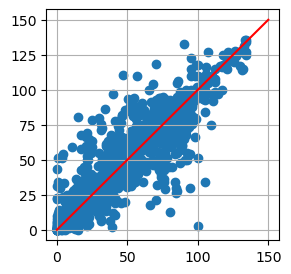

In [23]:
plt.figure(figsize=(3,3))
plt.scatter(y_test, y_pred_test)
plt.grid()
plt.plot([0, 150], [0, 150], c="r")
plt.show()

## Conclusions

After performing dimensionality reduction using PCA, the score results for both the classification and regression models were generally worse. Since PCA works by transforming the original variables into a smaller set of variables, termed principal components (PCs), while preserving as much variance in the data as possible, it is plausible that some information is lost in this process. In addition, the resulting PCs are produced by linear combinations of the original variables. If the relationships between the independent variables are non-linear, then the PCA may not capture the underlying non-linear structure of the data. As a result, the feature set composed of a smaller subset of variables (PCs) may lead to a decrease in model performance.

Based on the results shown here, we determined that the decision tree regressor with the full dataset was the best performing model for our analysis. The skewness of the target variable towards "High" and "Medium" categories in the training and validation sets might explain why the classification models in general performed worse than the regression models. When there is an imbalance of categories, with one having signicantly fewer instances than another, classication models may struggle to perform well due to bias towards the majority class. When the data is imbalanced, the classifier may learn to simply predict the majority class, resulting in poor performance on the minority class.